dementia    2465
MCI         1234
VMD          718
Normal       328
Name: Group, dtype: int64


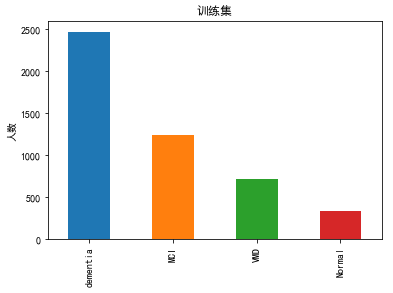

dementia    265
MCI         113
VMD          98
Normal       51
Name: Group, dtype: int64


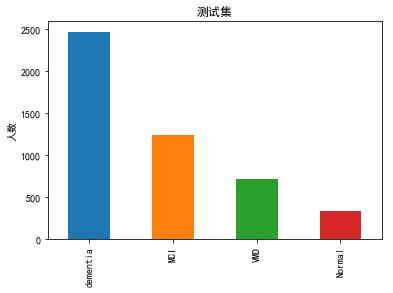

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#读入文件
path1='data\\train_relief.csv'
path2='data\\test_relief.csv'
path3='data\\train_infor.csv'
path4='data\\test_infor.csv'
path5='data\\train_rf.csv'
path6='data\\test_rf.csv'

data_train=pd.read_csv(path3)
#data_train=data_train.fillna(data_train.mean())
data_test=pd.read_csv(path4)
#data_test=data_test.fillna(data_test.mean())

#查看类别分布情况
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

print(data_train['Group'].value_counts())
data_train.Group.value_counts().plot(kind='bar')
plt.title(u'训练集')
plt.ylabel(u'人数')
plt.show()

print(data_test['Group'].value_counts())
data_train.Group.value_counts().plot(kind='bar')
plt.title(u'测试集')
plt.ylabel(u'人数')
plt.show()

In [33]:
X1 = data_train.drop("Group", axis=1) #获取训练集特征  
y1 = data_train["Group"]  #获取训练集标签列 
X2 = data_test.drop("Group", axis=1) #获取测试集特征  
y2 = data_test["Group"]  #获取测试集标签列

In [34]:
#模型训练
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve

random_state = 2018

def get_best_model(X1,y1,random_state):

    cv = StratifiedKFold(n_splits =5, shuffle=True, random_state = random_state)

    #训练模型
    lrc = LogisticRegression(random_state = random_state) 
    scoring = {'Recall': make_scorer(recall_score),
               'f1_score': make_scorer(f1_score)
              }

    params = {'class_weight':['balanced',None],
                    'penalty':['l2'], 
                    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
                    'multi_class' : ['ovr'],
                    'C':[0.0001,0.001,0.01,0.1,1,10]
                 }

    grid_clf = GridSearchCV(estimator = lrc, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
    grid_clf.fit(X1, y1)
    return grid_clf   
grid_clf = get_best_model(X1,y1,random_state)
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   33.1s finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2018, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'C': 10, 'class_weight': None, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve

random_state = 2018

lrc = LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=2018,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

def get_best_model(X1,y1,lrc,random_state):

    cv = StratifiedKFold(n_splits =5, shuffle=True, random_state = random_state)

    #训练Adaboost模型
    lrc = AdaBoostClassifier(base_estimator = lrc,random_state = random_state) 
    scoring = {'Recall': make_scorer(recall_score),
               'f1_score': make_scorer(f1_score)
              }

    params = { 'n_estimators':[10,30,50,70,100],
              'algorithm':['SAMME', 'SAMME.R']
                 }

    grid_clf = GridSearchCV(estimator = lrc, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
    grid_clf.fit(X1, y1)
    return grid_clf   
grid_clf = get_best_model(X1,y1,lrc,random_state)
best_clf = grid_clf.best_estimator_
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:   44.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.3s finished


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=2018,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=10, random_state=2018)
{'algorithm': 'SAMME', 'n_estimators': 10}


In [36]:
best_clf = AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=2018,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=10, random_state=2018)

In [37]:
##得到的最优模型评估训练集
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve,accuracy_score

best_lrc = lrc
def get_lr_score_cross(clf):
    target_name = ['Normal','MCI','VMD','dementia']
    predicted = cross_val_predict(clf, X1, y1, cv=5)
    #LogisticRegression模型交叉验证评估结果 加权重结果类别不平衡问题
    print('Logistic model准确度分数:',accuracy_score(y1, predicted)) #准确度分类得分
    print('Logistic model混淆矩阵\n',confusion_matrix(y1,predicted)) #混淆矩阵
    print("Logistic model召回率",recall_score(y1,predicted,average='micro'))#宏查全率
    print("Logistic model分类报告\n",classification_report(y1,predicted,target_names = target_name))#分类报告

    
    
def get_lr_score_test(clf):
    target_name = ['Normal','MCI','VMD','dementia']
    y_pred_score = clf.fit(X1,y1).predict(X2)
    #LogisticRegression模型 测试集 评估结果 加权重结果类别不平衡问题
    print('Logistic model准确度分数:',accuracy_score(y2, y_pred_score)) #准确度分类得分
    print('Logistic model混淆矩阵\n',confusion_matrix(y2,y_pred_score)) #混淆矩阵
    print("Logistic model召回率",recall_score(y2,y_pred_score,average='micro'))#宏查全率
    print("Logistic model分类报告\n",classification_report(y2,y_pred_score,target_names = target_name))#分类报告


print("交叉验证得到的评估结果")
get_lr_score_cross(best_lrc)
print('使用测试集得到的评估结果')
get_lr_score_test(best_lrc)

交叉验证得到的评估结果
Logistic model准确度分数: 0.7943097997892519
Logistic model混淆矩阵
 [[1116    5  109    4]
 [ 327    1    0    0]
 [ 159    1  417  141]
 [  25    1  204 2235]]
Logistic model召回率 0.7943097997892519
Logistic model分类报告
              precision    recall  f1-score   support

     Normal       0.69      0.90      0.78      1234
        MCI       0.12      0.00      0.01       328
        VMD       0.57      0.58      0.58       718
   dementia       0.94      0.91      0.92      2465

avg / total       0.76      0.79      0.77      4745

使用测试集得到的评估结果
Logistic model准确度分数: 0.7893738140417458
Logistic model混淆矩阵
 [[104   0   8   1]
 [ 51   0   0   0]
 [ 17   0  59  22]
 [  2   0  10 253]]
Logistic model召回率 0.7893738140417458
Logistic model分类报告
              precision    recall  f1-score   support

     Normal       0.60      0.92      0.72       113
        MCI       0.00      0.00      0.00        51
        VMD       0.77      0.60      0.67        98
   dementia       0.92      0.95     

D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve


best_boostclf = best_clf    
def get_lrboost_score_cross(clf):
    target_name = ['Normal','MCI','VMD','dementia']
    predicted = cross_val_predict(best_lrc, X1, y1, cv=5)
    #LogisticRegression模型交叉验证评估结果 加权重结果类别不平衡问题
    print('AdaBoost model准确度分数:',accuracy_score(y1, predicted)) #准确度分类得分
    print('AdaBoost model混淆矩阵\n',confusion_matrix(y1,predicted)) #混淆矩阵
    print("AdaBoost model召回率",recall_score(y1,predicted,average='micro'))#宏查全率
    print("AdaBoost model分类报告\n",classification_report(y1,predicted,target_names = target_name))#分类报告

    
    
def get_lrboost_score_test(clf):
    target_name = ['Normal','MCI','VMD','dementia']
    y_pred_score = clf.fit(X1,y1).predict(X2)
    #LogisticRegression模型 测试集 评估结果 加权重结果类别不平衡问题
    print('AdaBoost model准确度分数:',accuracy_score(y2, y_pred_score)) #准确度分类得分
    print('AdaBoost model混淆矩阵\n',confusion_matrix(y2,y_pred_score)) #混淆矩阵
    print("AdaBoost model召回率",recall_score(y2,y_pred_score,average='micro'))#宏查全率
    print("AdaBoost model分类报告\n",classification_report(y2,y_pred_score,target_names = target_name))#分类报告


print('对训练集使用交叉验证得到的评估结果')
get_lrboost_score_cross(best_boostclf)
print('使用测试集得到的评估结果')
get_lrboost_score_test(best_boostclf)

对训练集使用交叉验证得到的评估结果
AdaBoost model准确度分数: 0.7943097997892519
AdaBoost model混淆矩阵
 [[1116    5  109    4]
 [ 327    1    0    0]
 [ 159    1  417  141]
 [  25    1  204 2235]]
AdaBoost model召回率 0.7943097997892519
AdaBoost model分类报告
              precision    recall  f1-score   support

     Normal       0.69      0.90      0.78      1234
        MCI       0.12      0.00      0.01       328
        VMD       0.57      0.58      0.58       718
   dementia       0.94      0.91      0.92      2465

avg / total       0.76      0.79      0.77      4745

使用测试集得到的评估结果
AdaBoost model准确度分数: 0.7741935483870968
AdaBoost model混淆矩阵
 [[ 61  35  17   0]
 [  8  43   0   0]
 [ 13   0  54  31]
 [  0   0  15 250]]
AdaBoost model召回率 0.7741935483870968
AdaBoost model分类报告
              precision    recall  f1-score   support

     Normal       0.74      0.54      0.63       113
        MCI       0.55      0.84      0.67        51
        VMD       0.63      0.55      0.59        98
   dementia       0.89      0.9

In [39]:
AdaBoostClassifier?

Init signature: AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

Parameters
----------
base_estimator : object, optional (default=DecisionTreeClassifier)
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper `classes_`
    and `n_classes_` attributes.

n_estimators : integer, optional (default=50)
    The maximum number of estimators at which boosting is terminated.
    In case of perfec